# 2 лабораторная 
## выполнил Авербух Александр
## 18-ИВТ-3
## 22 вариант 
1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7. Заполните пропущенные значения в данных;
8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

In [32]:
import pandas as pd
import numpy as np

In [33]:
glass_df = pd.read_csv('/Users/aleksandraverbuh/Desktop/glass.csv')
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

1. Id number - Идентификационный номер
2. RI - Индекс преломления
3. Na - Концентрация Натрия
4. Mg - Концентрация Магния
5. Al - Концентрация Алюминия
6. Si - Концентрация Кремния
7. К - Концентрация Калия
8. Ca - Концентрация Кальция
9. Ba - Концентрация Бария
10. Fe - Концентрация Железа
11. Type of glass - Тип стекла

### 2. Удалите дубликаты строк в наборе данных, приведите размер набора данных до и после данной операции.

In [34]:
print("До удаление дубликатов: %d" % len(glass_df))
glass_df.drop_duplicates(keep="first", inplace=True)
print("После удаление дубликатов: %d" % len(glass_df))

До удаление дубликатов: 214
После удаление дубликатов: 213


### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

In [35]:
import seaborn as sn

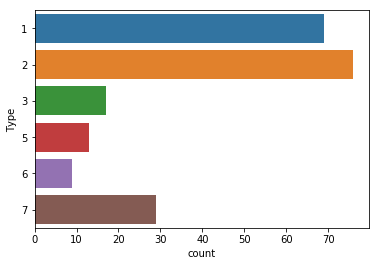

In [36]:
sn.countplot(data=glass_df, y='Type')

Вывод: первые два класса преобладают, лучше использовать PR

### 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

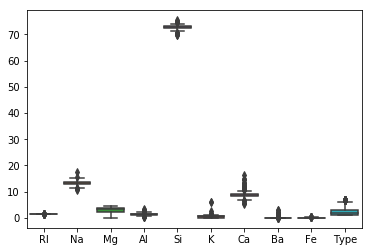

In [37]:
numerical = [c for c in glass_df.columns if glass_df[c].dtype.name != 'object']
sn.boxplot(data = glass_df[numerical])

In [38]:
from sklearn import preprocessing

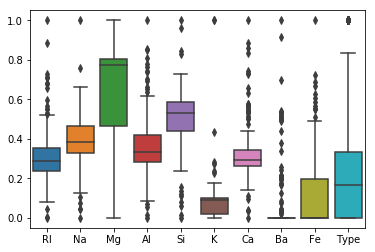

In [39]:
scaler = preprocessing.MinMaxScaler()
glass_df[numerical] = scaler.fit_transform(glass_df[numerical].values.astype(float))
sn.boxplot(data = glass_df[numerical])

### 5. Выполните замену категориальных признаков, выберите и обоснуйте способ замены.

#### Категориальные признаки отсутствуют

### 6. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации).

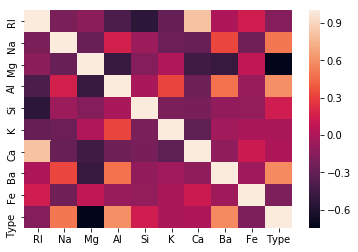

In [40]:
from sklearn.preprocessing import StandardScaler

corr_matrix = glass_df.corr()
sn.heatmap(corr_matrix)

### 7. Заполните пропущенные значения в данных.

In [41]:
glass_df.count()

RI      213
Na      213
Mg      213
Al      213
Si      213
K       213
Ca      213
Ba      213
Fe      213
Type    213
dtype: int64

#### Пропусков данных нет

### 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию.

 Классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов);


In [83]:
import matplotlib.pyplot as plt
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
%matplotlib inline

In [84]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

y = label_binarize(y, classes=[0,1,2])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

Best score: 0.95


/Users/aleksandraverbuh/opt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


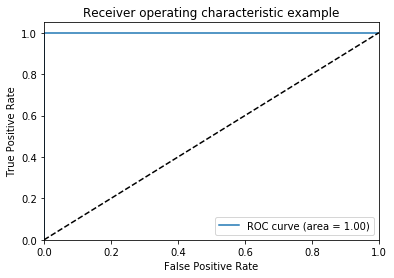

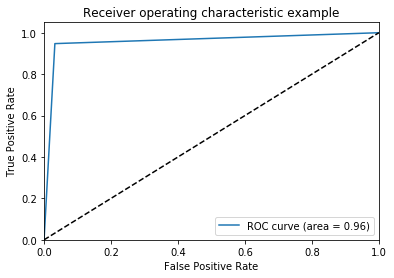

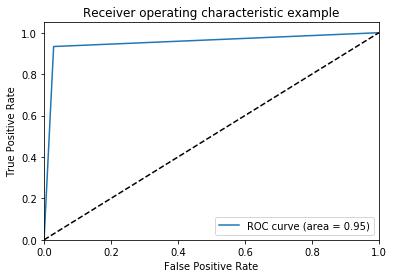

In [85]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)
y_score = rnc_grid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Best score: {}'.format(rnc_grid.best_score_))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Линейный классификатор (персептрон);

Best: 0.61


/Users/aleksandraverbuh/opt/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


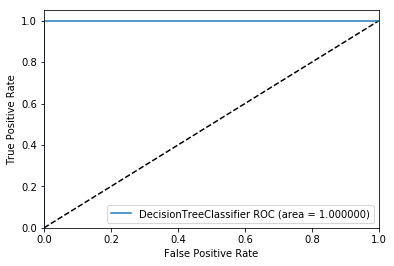

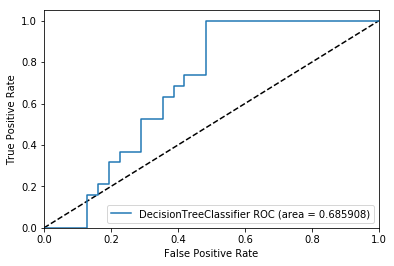

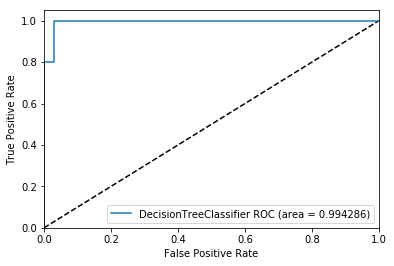

In [86]:
clf_perceptron = OneVsRestClassifier(linear_model.Perceptron())
params = {
      'estimator__alpha': np.linspace(0, 1, 50)[1:],
      }
param_search = GridSearchCV(estimator=clf_perceptron, param_grid=params)
param_search.fit(X_train, y_train)
y_score = param_search.best_estimator_.fit(X_train, y_train).decision_function(X_test)
print('Best: {}'.format(param_search.best_score_))
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc[i]))  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4, fontsize='medium')
    plt.show()

### 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

Из данных классификаторов эффективнее оказался классификатор К ближайших соседей(по заданному радиусу)